In [43]:
import time
import copy
import itertools
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
with open(os.getcwd() + '/graph-to-color.txt', 'r') as f:
    data = f.readlines()
edges = [(int(d.split(',')[0]), int(d.split(', ')[1].split(')')[0])) for d in data[0].split('(')[1:]]
print(len(edges))

355


In [3]:
def getPositions(G):
    return [tuple(i[1].values()) for i in G.nodes.data()]

def getLabels(G):
    return [i[0] for i in G.nodes.data()]

In [6]:
def graph_coloring_local(G, coloring=None):
    #initialize all nodes a different color
    n = G.number_of_nodes()
    
    if not coloring:
        coloring = {}
        for i in range(0, n):
            coloring[i] = i
            
    
    #assign random coordinates to nodes in G for printing
    pos = getPositions(G)
    lab = getLabels(G)


    local_opt = True
    while local_opt:
        
        colors = list(coloring.values())
        to_break = False

        for c, j in itertools.product(colors, colors):

            if j > c:
                subgraph_nodes_c = []
                subgraph_nodes_j = []

                for node in coloring.keys():
                #all nodes colored c
                    if coloring[node] == c:
                        subgraph_nodes_c.append(node)
                    #all nodes colored j
                    elif coloring[node] == j:
                        subgraph_nodes_j.append(node)

                # form subgraph with those 2 colors
                G1 = nx.Graph()
                G1 = G.subgraph(subgraph_nodes_c + subgraph_nodes_j)
                # no connected components (ie no edges), change color of j to c
                if G1.number_of_edges() == 0:
                    for k in subgraph_nodes_j:
                        coloring[k] = c
                    # print when a color is eliminated
                    values = [coloring.get(node, 0.25) for node in G.nodes()]
                    
                    # improvement found, update coloring and find new pair of colorings to swap
                    to_break = True 

                    # nx.draw(G, pos = pos, node_color = values, with_labels=True, font_color = 'white')
                    # plt.show()
                else:
                    #set of nodes for each connected components
                    comps = list(nx.connected_components(G1))

                    # initial function value -(|c|^2+|j|^2)
                    c_size = len(subgraph_nodes_c)
                    j_size = len(subgraph_nodes_j)
                    v_int = -(c_size**2 + j_size**2)
                    
                    
                    for l in comps:
                    # changed function value
                        l = list(l)
                        c_swap = list(set(subgraph_nodes_c) & set(l))
                        j_swap = list(set(subgraph_nodes_j) & set(l))
                        v_change = -((c_size + len(j_swap) - len(c_swap))**2 + (j_size + len(c_swap) - len(j_swap))**2)
                        if v_change < v_int:
                            for k in c_swap:
                                coloring[k] = j
                            for k in j_swap:
                                coloring[k] = c
                            break
                            
                            # improvement found, update coloring and find new pair of colorings to swap
                            to_break = True
                            
                if to_break:
                    break

        # at end of for loop no swaps happen
        if not to_break:
            # if ever all pairs of colors checked without breaking, local minimum; stop algorithm
            local_opt = False


    values = [coloring.get(node, 0.25) for node in G.nodes()]
    num = len(set(coloring.values()))
    print("the feasible coloring is: ", set(coloring.values()))
    print("number of colors used =", num)
    nx.draw(G, pos=pos, node_color=values, with_labels=True, font_color='white')
    plt.show()

    return coloring

In [7]:
graph = nx.Graph()
graph.add_edges_from(edges)
n = graph.number_of_nodes()
for index in range(n):
    graph.add_node(
        index, 
        x=np.random.uniform(), 
        y=np.random.uniform()
    )

the feasible coloring is:  {0, 2, 35, 5}
number of colors used = 4


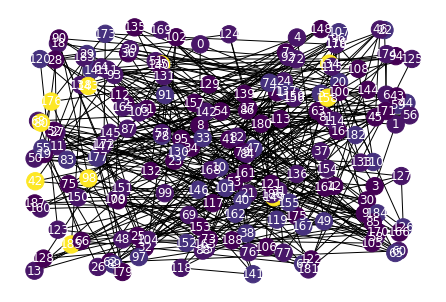

In [8]:
result = graph_coloring_local(graph)

In [9]:
result

{0: 2,
 1: 2,
 2: 0,
 3: 0,
 4: 2,
 5: 5,
 6: 2,
 7: 0,
 8: 0,
 9: 0,
 10: 5,
 11: 2,
 12: 0,
 13: 2,
 14: 5,
 15: 2,
 16: 0,
 17: 0,
 18: 2,
 19: 0,
 20: 5,
 21: 2,
 22: 5,
 23: 0,
 24: 2,
 25: 0,
 26: 2,
 27: 2,
 28: 0,
 29: 5,
 30: 0,
 31: 2,
 32: 0,
 33: 5,
 34: 0,
 35: 35,
 36: 0,
 37: 2,
 38: 5,
 39: 2,
 40: 5,
 41: 0,
 42: 35,
 43: 0,
 44: 5,
 45: 0,
 46: 2,
 47: 5,
 48: 2,
 49: 5,
 50: 2,
 51: 2,
 52: 0,
 53: 0,
 54: 0,
 55: 5,
 56: 2,
 57: 2,
 58: 2,
 59: 5,
 60: 2,
 61: 0,
 62: 0,
 63: 0,
 64: 2,
 65: 5,
 66: 0,
 67: 5,
 68: 2,
 69: 2,
 70: 0,
 71: 0,
 72: 2,
 73: 0,
 74: 5,
 75: 0,
 76: 2,
 77: 2,
 78: 5,
 79: 0,
 80: 35,
 81: 0,
 82: 2,
 83: 5,
 84: 2,
 85: 0,
 86: 0,
 87: 2,
 88: 2,
 89: 5,
 90: 0,
 91: 5,
 92: 2,
 93: 2,
 94: 0,
 95: 0,
 96: 2,
 97: 5,
 98: 35,
 99: 2,
 100: 0,
 101: 5,
 102: 0,
 103: 2,
 104: 2,
 105: 0,
 106: 0,
 107: 5,
 108: 0,
 109: 2,
 110: 5,
 111: 2,
 112: 0,
 113: 0,
 114: 2,
 115: 2,
 116: 5,
 117: 0,
 118: 2,
 119: 5,
 120: 5,
 121: 0,
 122: 0,

In [10]:
color_counts = pd.Series(result).value_counts()
color_counts

2     70
0     67
5     42
35    10
dtype: int64